In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#odeint is the numerical integration of ODEs through the scipy package
from scipy.integrate import odeint

In [2]:
#Functions Useful for plotting
def AddAxisLabels(): 
  plt.legend(fontsize=20)
  plt.xlabel("Time")
  plt.ylabel("Total Amount")
  plt.grid()

def PlotOutputGeneral(Species,Time): 
  #Extracting each species into identifiable variables
  E   = Species[:,0]
  S   = Species[:,1]
  ES  = Species[:,2]
  P   = Species[:,3]
  I   = Species[:,4]
  EI  = Species[:,5]
  ESI = Species[:,6]

  #Plot Product and Substrate 
  plt.figure(figsize=(3*6.4, 4.8))
  plt.subplot(1,3,1)
  plt.plot(t,P,label='P')
  plt.plot(t,S,label='S')
  AddAxisLabels()

  #Plot Enzyme and ES complex 
  plt.subplot(1,3,2)
  plt.plot(t,E,label='E')
  plt.plot(t,ES,label='ES')
  AddAxisLabels()

  #Plot E alone
  plt.subplot(1,3,3)
  plt.plot(t,E,label='E')
  AddAxisLabels()

  #Plot ES alone
  plt.figure()
  plt.plot(t,ES,label='ES')
  AddAxisLabels()

  #Plot Inhibitors 
  plt.figure(figsize=(3*6.4, 4.8))
  plt.subplot(1,3,1)
  plt.plot(t,I,label="I")
  AddAxisLabels()

  plt.subplot(1,3,2)
  plt.plot(t,EI,label="EI")
  AddAxisLabels()

  plt.subplot(1,3,3)
  plt.plot(t,ESI,label="ESI")
  AddAxisLabels()

def PlotOutput(WithInhibition,WithoutInhibition,Time,ModelSpecies): 
  indexes_of_speces = {"E":0,"S":1,"ES":2,"P":3,"I":4,"EI":5,"ESI":6}

  if ModelSpecies in indexes_of_speces.keys():  
    chosen_index = indexes_of_speces[ModelSpecies]
  else: 
    print("Last input not correct. Ensure its one of these:")
    print(indexes_of_speces.keys())
    return None

  plt.plot(Time,WithInhibition[:,chosen_index],label="With Inhibition")
  plt.plot(Time,WithoutInhibition[:,chosen_index],label="Without Inhibition")
  plt.legend(fontsize=10)
  plt.xlabel("Time",fontsize=20)
  plt.ylabel(ModelSpecies,fontsize=20)

  return None

def PlotAll(WithInhibition,WithoutInhibition,Time):
  indexes_of_speces = {"E":0,"S":1,"ES":2,"P":3,"I":4,"EI":5,"ESI":6}

  plt.figure(figsize=(3*6.4, 3*4.8))
  for ith,speciesith in enumerate(indexes_of_speces):
    plt.subplot(3,3,ith+1)
    PlotOutput(WithInhibition,WithoutInhibition,Time,speciesith)
    plt.grid()

  E   = WithInhibition[:,indexes_of_speces["E"]] 
  ES  = WithInhibition[:,indexes_of_speces["ES"]] 
  EI  = WithInhibition[:,indexes_of_speces["EI"]] 
  ESI = WithInhibition[:,indexes_of_speces["ESI"]] 
  Total = E + ES+EI+ESI
  plt.subplot(3,3,ith+2)
  plt.plot(Time,E/Total,label="Fraction Free E")  
  plt.plot(Time,ES/Total,label="Fraction ES")  
  plt.plot(Time,EI/Total,label="Fraction EI")  
  plt.plot(Time,ESI/Total,label="Fraction ESI")  
  plt.legend()
  plt.xlabel("Time")
  plt.ylabel("Fraction of Total Enzyme")
  plt.title("Output WIth Inhibition, I_Initial = {}".format(WithInhibition[0,indexes_of_speces["I"]]))
  plt.tight_layout()
  plt.grid()

  #Without Inhbition
  E   = WithoutInhibition[:,indexes_of_speces["E"]] 
  ES  = WithoutInhibition[:,indexes_of_speces["ES"]] 
  EI  = WithoutInhibition[:,indexes_of_speces["EI"]] 
  ESI = WithoutInhibition[:,indexes_of_speces["ESI"]] 
  Total = E + ES+EI+ESI
  plt.subplot(3,3,ith+3)
  plt.plot(Time,E/Total,label="Fraction Free E")  
  plt.plot(Time,ES/Total,label="Fraction ES")  
  plt.plot(Time,EI/Total,label="Fraction EI")  
  plt.plot(Time,ESI/Total,label="Fraction ESI")  
  plt.legend()
  plt.xlabel("Time")
  plt.ylabel("Fraction of Total Enzyme")
  plt.title("Output WIth Inhibition, I_Initial = 0".format(WithInhibition[0,indexes_of_speces["I"]]))
  plt.tight_layout()
  plt.grid()

In [3]:
#Mixed inhibition Model

def MixedInhibitionEnzymeKinetics(X,T,k1,k2,k3,kcf,kcr,kuf,kur):
    E,S,ES,P,I,EI,ESI = X 

    #Foward Rate of Enzyme/Subtrate complex 
    #[E] + [S] -> [ES]
    R_f1 = k1*E*S 

    #Reverse Rate of Enzyme/Substrate Complex 
    # [ES] -> [E] + [S]
    R_r2 = k2*ES

    #Rate of product formtion: 
    #[ES] -> [P] + [E]
    R_f3 = k3*ES 

    #Rate of I binding to E 
    #[E] + [I] -> [EI]
    R_fc = kcf*E*I 

    #Rate of inhibitor unbinding to EI 
    #[EI] -> [E] + [I]
    R_rc = kcr*EI 

    #Rate of I Binding to ES 
    #[ES] + [I] -> [ESI]
    R_uf = kuf*ES*I 

    #Rate of inhibitor unbinding to ESI 
    #[ESI] -> [ES] + [I]
    R_ur = kur*ESI


    #----------------------------------------------------------------------------
    #Making the ODES -> See slide 16 
    #----------------------------------------------------------------------------
    E_ode   = -R_f1 + R_r2 + R_f3 - R_fc + R_rc 
    S_ode   = -R_f1 + R_r2
    ES_ode  =  R_f1 - R_r2 - R_f3 - R_uf + R_ur
    P_ode   =  R_f3
    I_ode   = -R_fc + R_rc - R_uf + R_ur
    EI_ode  =  R_fc - R_rc
    ESI_ode =  R_uf - R_ur

    return [E_ode,S_ode,ES_ode,P_ode,I_ode, EI_ode, ESI_ode]




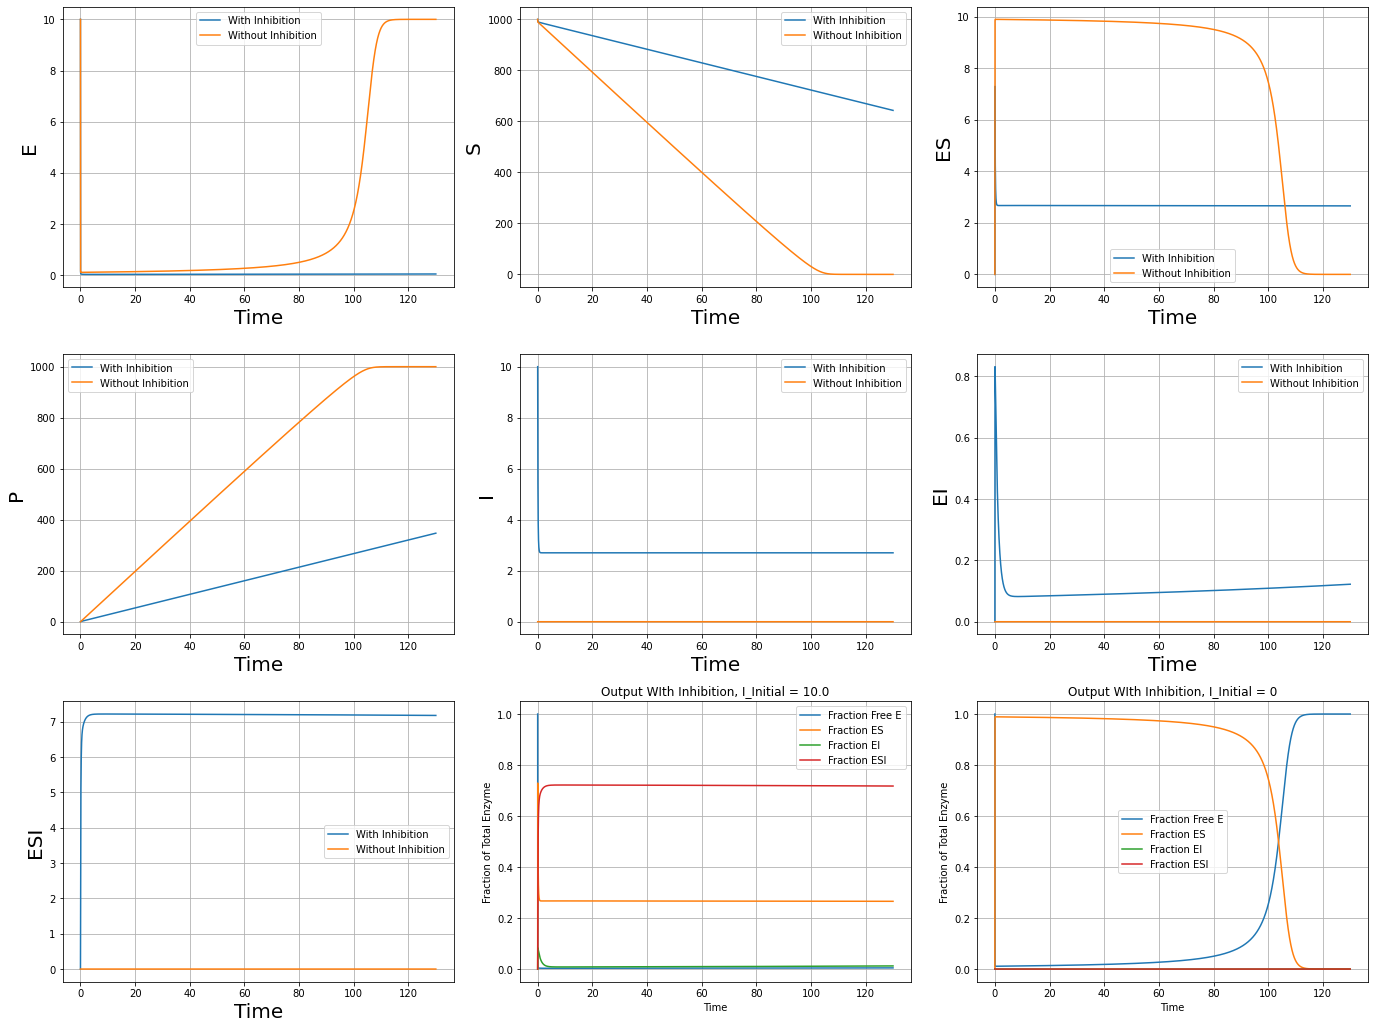

In [4]:
simulation_max = 130
n_points = 10000

#Parameters: 
k1  = .1 
k2  = .1
k3  = 1
kcf = 1
kcr = 1
kuf = 1
kur = 1

#Intial Values 
E0   = 10
S0   = 1000
ES0  = 0
P0   = 0
I0   = 10
EI0  = 0
ESI0 = 0

t = np.linspace(0,simulation_max,n_points) 
argtuple = (k1,k2,k3,kcf,kcr,kuf,kur)

#Simulating WITH inhbitor 
species_0 = [E0,S0,ES0,P0,I0,EI0,ESI0]
species_with_inhibotor = odeint(MixedInhibitionEnzymeKinetics, species_0, t, 
                                args=argtuple)

#Simulating WITHOUT inhibitor
species_0 = [E0,S0,ES0,P0,0,EI0,ESI0]
species_without_inhibitor = odeint(MixedInhibitionEnzymeKinetics, species_0, t, args=argtuple)



PlotAll(species_with_inhibotor ,species_without_inhibitor,t)

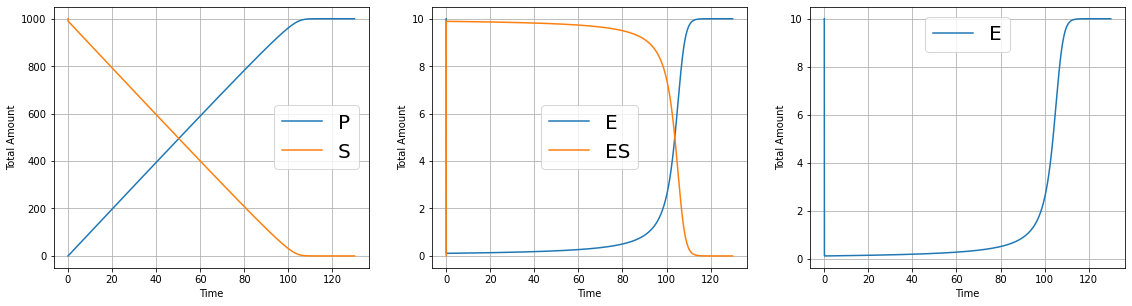

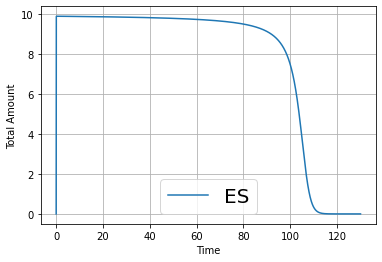

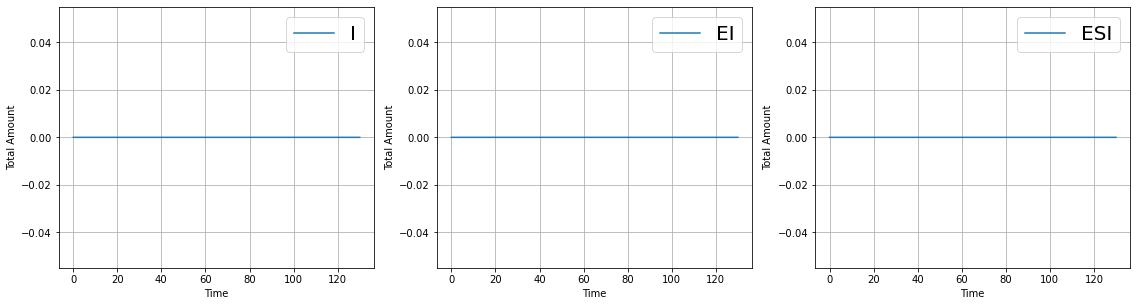

In [5]:
simulation_max = 130
n_points = 10000
#Simulating WITHOUT inhibitor
t = np.linspace(0,simulation_max,n_points) 
I0=0 
species_0 = [E0,S0,ES0,P0,I0,EI0,ESI0]
species_without_inhibitor = odeint(MixedInhibitionEnzymeKinetics, species_0, t, args=argtuple)
PlotOutputGeneral(species_without_inhibitor,t)